In [364]:
import pandas as pd
import numpy as np

# Read the data into a pandas DataFrame

path = '/Users/jerzybala/Desktop/Simulation Experiments Aug-Sep 2023/PROCESSED_FOOD_Dec2023.csv'
df_org = pd.read_csv(path)

print(df_org.shape)
#df_org.columns.tolist()

# Calculate the original distribution
original_distribution = df_org['Processed food in diet'].value_counts()
print(original_distribution)

/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/ipykernel_29982/2491996354.py:7: DtypeWarning: Columns (91,93,94,116,117,124,125,126,128,129,130,131,132,133) have mixed types. Specify dtype option on import or set low_memory=False.
  df_org = pd.read_csv(path)


(401682, 239)
Rarely/Never            127106
A few times a month     125715
A few times a week       84969
Rarely/never             27105
Once a day               20110
Several times a day      16050
A few times in a day       317
Several days a week        151
Many times in a day        138
At least once a day         21
Name: Processed food in diet, dtype: int64


In [434]:

region_mapping = {
    'Anglosphere': ['United States', 'Canada', 'United Kingdom', 'Ireland', 'New Zealand', 'Australia'],
    'Latin America': ['Argentina', 'Chile', 'Colombia', 'Ecuador', 'Guatemala', 'Mexico', 'Peru', 'Puerto Rico', 'Venezuela', 'Brazil', 'Bolivia', 'Paraguay', 'Uruguay'],
    'Middle East': ['Iraq', 'Saudi Arabia', 'United Arab Emirates', 'Yemen', 'Iran', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Syria', 'Bahrain'],
    'French & Spanish Speaking Mainland Europe': ['Spain', 'France', 'Belgium', 'Switzerland', 'Portugal', 'Italy', 'Greece', 'Germany', 'Austria', 'Netherlands'],
    'West Africa': ['Cameroon', 'Cote d’Ivoire', 'Democratic Republic of the Congo', 'Nigeria', 'Ghana', 'Senegal', 'Mali', 'Niger', 'Guinea'],
    'North Africa': ['Algeria', 'Egypt', 'Morocco', 'Tunisia', 'Libya', 'Sudan'],
    'East & Southeast Asia': ['China', 'Japan', 'South Korea', 'North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Indonesia', 'Philippines', 'Singapore'],
    'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan'],
    'Eastern Europe & Central Asia': ['Russia', 'Ukraine', 'Belarus', 'Moldova', 'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan'],
    'Scandinavia & Baltic': ['Sweden', 'Norway', 'Finland', 'Denmark', 'Iceland', 'Estonia', 'Latvia', 'Lithuania'],
    'Oceania & Pacific Islands': ['Fiji', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga'],
    'Sub-Saharan Africa': ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'South Africa', 'Zimbabwe', 'Zambia', 'Botswana', 'Namibia', 'Mozambique', 'Madagascar'],
    'Central America & Caribbean': ['Cuba', 'Dominican Republic', 'Haiti', 'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Saint Lucia', 'Grenada', 'Belize', 'Costa Rica', 'El Salvador', 'Honduras', 'Nicaragua', 'Panama']
    # ... You can continue to add more regions and countries as needed.
}


# Invert the region mapping
country_to_region = {country: region for region, countries in region_mapping.items() for country in countries}

# Map each country to its region
df_org['Region'] = df_org['Country'].map(country_to_region)

# Now 'data' has an additional column 'Region' which indicates the region of each country





filter_columns1 = [
 'Overall MHQ',
 'MHQ_Sign',
 
 'Age',
 'Biological Sex',
 'Different gender from biological sex',
 'Gender Identity',
 'Ethnicity',
 'Country',
 'State',
 'Place of living',
 'City',
 'Education',
 'Employment',
 'Profession/Employment Sector',
 
 'Frequency of getting a good nights sleep',
 'Frequency of doing exercise',
 'Processed food in diet',
 'Frequency of Socializing',
 
 'Number of Children',
 'Household Size',
 'Number of Siblings when growing up',
 'Number of Close Friends',
 
 'Description of Household Growing up',
 'Relationship with Adult Family',
 'Spirituality connection',
 'Feelings of love towards others',
 'Particular religion identity',
 'Religion practice',
 
 'Smartphone allowed in school',
 'Smartphone use in lessons',
 'Age of first social media account',
 'Frequency of social media posting',
 'Tablet ownership',
 'Smartphone ownership',
 'Friends/classmates smarphone ownership',
 'Age of smartphone usage during school hours',
 'Smartphone usage during class hours',
 'Smartphone usage during break',
 'Age of laptop usage required by school',
 'Laptop usage for non-learning activities',

 'Sudden or premature death of a loved one',
 'Divorce/separation  or family breakup',
 'Extreme poverty leading to homelessness and/or hunger.',
 'Forced family control over major life decisions (e.g. marriage)',
 'Prolonged sexual abuse| or severe sexual assault.',
 'Displacement from your home due to political| environmental or economic reasons',
 'Loss of your job or livelihood leading to an inability to make ends meet.',
 'Cyberbullying or online abuse',
 'Threatening| coercive or controlling behavior by another person',
 'Caring for a child or partner with a major chronic disability or illness',
 'I did not experience any of the above',
 'Involvement or close witness to a war',
 'Life threatening or debilitating injury or illness.',
 'Suffered a loss in a major fire| flood| earthquake| or natural disaster',
 'None of the above AT',

 'Type II Diabetes',
 'Fibromyalgia',
 'Liver disease/Cirrhosis',
 'Hypertension',
 'Irritable Bowel Syndrome',
 'Heart disease',
 "Inflammatory Bowel Disease / Crohn's disease",
 'Arthritis',
 'Psoriasis',
 'Asthma',
 'Migraines',
 'Traumatic Brain Injury',
 'Osteoporosis',
 'Sleep apnea',
 'Hipotiroidismo',
 'Neuropathy',
 'Cancer',
 'Chronic Obstructive Pulmonary Disease (COPD)',
 'HIV /AIDS',
 'Kidney Disease',
 'Rheumatoid',
 'Polycystic ovaries',
 'Prefer not to say',
 'Narcolepsy',
 'Chronic fatigue syndrome',
 'Back problem',
 'Epilepsy',
 'Multiple sclerosis',
 'Escoliosis',
 'Stroke',
 'Herpes',
 'Type 1 Diabetes',

 'Sudden or premature death of a parent or sibling',
 'Prolonged emotional or psychological abuse or neglect from parent/caregiver',
 'Prolonged physical abuse| or severe physical assault CT',
 'Physical violence in the home between family members',
 'Prolonged or sustained bullying in person from peers',
 'Parental Divorce or family breakup',
 'Lived with a parent/caregiver who was an alcoholic or who regularly used street drugs',
 'Threatening| coercive or controlling behavior by another person CT',
 'I did not experience any of the above during my childhood',
 'Suffered a loss in a major fire| flood| earthquake| or natural disaster CT',
 'Displacement from your home due to political| environmental or economic reasons CT',
 'Life threatening or debilitating injury or illness CT',
 'Forced family control over major life decisions CT',
 'None of the above CT',

 'Tobacco products',
 'Alcoholic beverages',
 'Cannabis',
 'Vaping products',
 'Sedatives or Sleeping Pills',
 'Amphetamine type stimulants (e.g. speed| diet pills| ecstasy| etc.)',
 'Opioids',
 'Melatonina',
 'Cigarrillo',
 'None of the above']


# Shorter width data

filter_columns2 = [
 'Overall MHQ',
 'MHQ_Sign',
 
 'Age',
 'Biological Sex',
 'Country',
 'Region',
 
 'Frequency of getting a good nights sleep',
 'Frequency of doing exercise',
 'Processed food in diet',
 'Frequency of Socializing',
 
 'Sudden or premature death of a loved one',
 'Divorce/separation  or family breakup',
 'Extreme poverty leading to homelessness and/or hunger.',
 'Forced family control over major life decisions (e.g. marriage)',
 'Prolonged sexual abuse| or severe sexual assault.',
 'Displacement from your home due to political| environmental or economic reasons',
 'Loss of your job or livelihood leading to an inability to make ends meet.',
 'Cyberbullying or online abuse',
 'Threatening| coercive or controlling behavior by another person',
 'Caring for a child or partner with a major chronic disability or illness',
 'I did not experience any of the above',
 'Involvement or close witness to a war',
 'Life threatening or debilitating injury or illness.',
 'Suffered a loss in a major fire| flood| earthquake| or natural disaster',
 'None of the above AT',

 'Type II Diabetes',
 'Fibromyalgia',
 'Liver disease/Cirrhosis',
 'Hypertension',
 'Irritable Bowel Syndrome',
 'Heart disease',
 "Inflammatory Bowel Disease / Crohn's disease",
 'Arthritis',
 'Psoriasis',
 'Asthma',
 'Migraines',
 'Traumatic Brain Injury',
 'Osteoporosis',
 'Sleep apnea',
 'Hipotiroidismo',
 'Neuropathy',
 'Cancer',
 'Chronic Obstructive Pulmonary Disease (COPD)',
 "HIV /AIDS",
 'Kidney Disease',
 'Rheumatoid',
 'Polycystic ovaries',
 'Prefer not to say',
 'Narcolepsy',
 'Chronic fatigue syndrome',
 'Back problem',
 'Epilepsy',
 'Multiple sclerosis',
 'Escoliosis',
 'Stroke',
 'Herpes',
 'Type 1 Diabetes',


 'Sudden or premature death of a parent or sibling',
 'Prolonged emotional or psychological abuse or neglect from parent/caregiver',
 'Prolonged physical abuse| or severe physical assault CT',
 'Physical violence in the home between family members',
 'Prolonged or sustained bullying in person from peers',
 'Parental Divorce or family breakup',
 'Lived with a parent/caregiver who was an alcoholic or who regularly used street drugs',
 'Threatening| coercive or controlling behavior by another person CT',
 'I did not experience any of the above during my childhood',
 'Suffered a loss in a major fire| flood| earthquake| or natural disaster CT',
 'Displacement from your home due to political| environmental or economic reasons CT',
 'Life threatening or debilitating injury or illness CT',
 'Forced family control over major life decisions CT',
 'None of the above CT',


 'Tobacco products',
 'Alcoholic beverages',
 'Cannabis',
 'Vaping products',
 'Sedatives or Sleeping Pills',
 'Amphetamine type stimulants (e.g. speed| diet pills| ecstasy| etc.)',
 'Opioids',
 'Melatonina',
 'Cigarrillo',
 'None of the above']



filter_columns3 = [
 'Overall MHQ',
 'MHQ_Sign',
 
 'Age',
 'Biological Sex',
 
 'Country',
 
 'Frequency of getting a good nights sleep',
 'Frequency of doing exercise',
 'Processed food in diet',
 'Frequency of Socializing',
 
 'Sudden or premature death of a loved one',
 'Divorce/separation  or family breakup',
 'Extreme poverty leading to homelessness and/or hunger.',
 'Forced family control over major life decisions (e.g. marriage)',
 'Prolonged sexual abuse| or severe sexual assault.',
 'Displacement from your home due to political| environmental or economic reasons',
 'Loss of your job or livelihood leading to an inability to make ends meet.',
 'Cyberbullying or online abuse',
 'Threatening| coercive or controlling behavior by another person',
 'Caring for a child or partner with a major chronic disability or illness',
 'I did not experience any of the above',
 'Involvement or close witness to a war',
 'Life threatening or debilitating injury or illness.',
 'Suffered a loss in a major fire| flood| earthquake| or natural disaster',
 'None of the above AT',

 'Sudden or premature death of a parent or sibling',
 'Prolonged emotional or psychological abuse or neglect from parent/caregiver',
 'Prolonged physical abuse| or severe physical assault CT',
 'Physical violence in the home between family members',
 'Prolonged or sustained bullying in person from peers',
 'Parental Divorce or family breakup',
 'Lived with a parent/caregiver who was an alcoholic or who regularly used street drugs',
 'Threatening| coercive or controlling behavior by another person CT',
 'I did not experience any of the above during my childhood',
 'Suffered a loss in a major fire| flood| earthquake| or natural disaster CT',
 'Displacement from your home due to political| environmental or economic reasons CT',
 'Life threatening or debilitating injury or illness CT',
 'Forced family control over major life decisions CT',
 'None of the above CT',
]








df_org2=df_org[filter_columns2]



print(df_org2['Processed food in diet'].value_counts())
print(df_org2.shape, "\n")

df_org2['Processed food in diet'] = df_org2['Processed food in diet'].replace({'Rarely/never': 'Rarely/Never'})
print(df_org2['Processed food in diet'].value_counts())
print(df_org2.shape, "\n")



Rarely/Never            127106
A few times a month     125715
A few times a week       84969
Rarely/never             27105
Once a day               20110
Several times a day      16050
A few times in a day       317
Several days a week        151
Many times in a day        138
At least once a day         21
Name: Processed food in diet, dtype: int64
(401682, 81) 

Rarely/Never            154211
A few times a month     125715
A few times a week       84969
Once a day               20110
Several times a day      16050
A few times in a day       317
Several days a week        151
Many times in a day        138
At least once a day         21
Name: Processed food in diet, dtype: int64
(401682, 81) 



/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/ipykernel_29982/2224768782.py:309: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org2['Processed food in diet'] = df_org2['Processed food in diet'].replace({'Rarely/never': 'Rarely/Never'})


In [ ]:
df_org2['Country'].value_counts()

In [ ]:
df_org2['Region'].value_counts()

In [ ]:
df=df_org2.copy()
print(df['Country'].value_counts())

In [ ]:
nan_count = df_org2['Processed food in diet'].isna().sum()
print(f"Number of NaN values in 'Processed food in diet': {nan_count}")

# TEST DATA SIMULATION

In [435]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

df=df_org2.copy()





# +++++++++++++++++++++++++++++++++++++++++++++++++
# FILTERS
age_groups1 = ['18-24', '25-34']
age_groups2 = ['18', '19', '20']
age_groups3 = ['18', '19', '20','18-24', '25-34']




#df = df[df['Age'].isin(age_groups3)]



#  'Region_Anglosphere',
#  'Region_Central America & Caribbean',
#  'Region_East & Southeast Asia',
#  'Region_Eastern Europe & Central Asia',
#  'Region_French & Spanish Speaking Mainland Europe',
#  'Region_Latin America',
#  'Region_Middle East',
#  'Region_North Africa',
#  'Region_Oceania & Pacific Islands',
#  'Region_Scandinavia & Baltic',
#  'Region_South Asia',
#  'Region_Sub-Saharan Africa',
#  'Region_West Africa',

region_group_A = ['Anglosphere']
#df = df[df['Region'].isin(region_group_A)]

df = df[df['Country'].isin(['India'])]



# +++++++++++++++++++++++++++++++++++++++++++++++++









# # New feature 'Process_Food_Bin'
# # List of values that should map to 1
# value_list = ['A few times a month', 'A few times a week', 'Once a day', 'Several times a day']

# # Create a dictionary mapping each item in the list to 1, and 'Rarely/Never' to 0
# feature_mapping = {value: 1 for value in value_list}
# feature_mapping['Rarely/Never'] = 0

# # Map the values in 'Processed_food_in_diet' using this dictionary
# df['Process_Food_Bin'] = df['Processed food in diet'].map(feature_mapping)
# df=df.drop('Processed food in diet', axis=1)






# Rarely/Never            154211
# A few times a month     125715
# A few times a week       84969
# Once a day               20110
# Several times a day      16050
# A few times in a day       317
# Several days a week        151
# Many times in a day        138
# At least once a day         21



# FOOD GROUPS
bad_food_behavior = ['Once a day', 'Several times a day', 'A few times in a day']
good_food_behavior = ['Rarely/Never']
# Combine both lists to create a complete list of behaviors and filter data
all_food_behavior = bad_food_behavior + good_food_behavior
df = df[df['Processed food in diet'].isin(all_food_behavior)]







# Create a dictionary mapping each item in the list to 1, and 'Rarely/Never' to 0
feature_mapping = {value: 1 for value in bad_food_bahavior}  # 1 FOR THE BAD BAHAVIOR
feature_mapping['Rarely/Never'] = 0
# Map the values in 'Processed_food_in_diet' using this dictionary
df['Process_Food_Bin'] = df['Processed food in diet'].map(feature_mapping)
df=df.drop('Processed food in diet', axis=1)



#df = df[df['Process_Food_Bin'].isin([0, 1])]

#df = df.drop(columns='Country')


# # Convert 'Class' from "positive"/"negative" to 1/0
# class_mapping = {'positive': 1, 'negative': 0}
# df['Class'] = df['Class'].map(class_mapping)


# # Assuming data is your DataFrame
# # One-hot encode the categorical features
# categorical_features_temp = ['Age', 'Biological_Sex', 'Place_of_living', 'Education', 
#                         'Employment', 'Frequency_of_getting_a_good_nights_sleep', 
#                         'Frequency_of_doing_exercise', 'Frequency_of_Socializing', 
#                         'Current_Family_Situation', 
#                         'Age_of_smartphone_ownership']







# Select only the columns with object type (commonly used for categorical features)
categorical_features = df.select_dtypes(include=['object']).columns


# Apply pd.get_dummies to the categorical features with a prefix
encoded_features = pd.get_dummies(df[categorical_features])

# Concatenate the encoded features with the original DataFrame (excluding the original categorical features)

df = pd.concat([df.drop(columns=categorical_features), encoded_features], axis=1)




# +++++++++++++++++++++++++++++++++++++++++++++++++

X = df.drop(columns=['MHQ_Sign','Overall MHQ'], axis=1)

# classification
y = df['MHQ_Sign']
# regressioin
y_regression = df['Overall MHQ']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)


# +++++++++++++++++++++++++++++++++++++++++++++++++

df.columns.to_list()

print(len(df))



20527


In [438]:
india = [

'Process_Food_Bin',
'Frequency of doing exercise_Rarely/Never',
'Physical violence in the home between family members',
'Age_65-74',
'Frequency of getting a good nights sleep_Hardly ever',
'Frequency of Socializing_Rarely/Never',
'Frequency of doing exercise_Every day',
'Prolonged emotional or psychological abuse or neglect from parent/caregiver',
'Frequency of getting a good nights sleep_Most of the time',
'Age_18-24',
'Age_55-64',
'Age_18',
'Age_25-34',
'Frequency of getting a good nights sleep_Some of the time',
'Frequency of Socializing_1-3 times a month',
'Parental Divorce or family breakup',
'Age_21-24',
'Frequency of Socializing_Several days a week',
'Prolonged physical abuse| or severe physical assault CT',
'Threatening| coercive or controlling behavior by another person',
'Prefer not to say',
'Frequency of doing exercise_Few days a week',
'Prolonged or sustained bullying in person from peers',
'Biological Sex_Male',
'Prolonged sexual abuse| or severe sexual assault.',
'Biological Sex_Female',
'Migraines',
'Narcolepsy',
'Extreme poverty leading to homelessness and/or hunger.',
'Chronic fatigue syndrome',
'Divorce/separation  or family breakup',
'Alcoholic beverages',
'Sedatives or Sleeping Pills',
'Involvement or close witness to a war',
'Lived with a parent/caregiver who was an alcoholic or who regularly used street drugs',
'Arthritis',
'Cyberbullying or online abuse',
'Escoliosis',
'Age_85+',
'Country_India',
'Psoriasis',
'Opioids',
'Amphetamine type stimulants (e.g. speed| diet pills| ecstasy| etc.)',
'Multiple sclerosis',
'MHQ_Sign',
'Overall MHQ']




# +++++++++++++++++++++++++++++++++++++++++++++++++

X = df.drop(columns=['MHQ_Sign','Overall MHQ'], axis=1)

# classification
y = df['MHQ_Sign']
# regressioin
y_regression = df['Overall MHQ']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)



In [425]:
print(df['Process_Food_Bin'].unique())

print(df['Process_Food_Bin'].value_counts())

print(df['Process_Food_Bin'].shape)

[0 1]
0    17119
1     3408
Name: Process_Food_Bin, dtype: int64
(20527,)


In [386]:
df.shape


(275678, 347)

# CLASSIFICATION &  REGRESSION FUNCTIONS

In [479]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import math


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

def evaluate_model(X_train, X_test, y_train, y_test , percentage_change):
    

    # Copy the test set to avoid modifying the original data
    X_test_modified = X_test.copy()

    # Identify indices in X_test where 'Process_Food_Bin' is 1
    indices_to_change = X_test_modified[X_test_modified['Process_Food_Bin'] == 1].index

    # Calculate the number of indices to change
    num_indices_to_change = int(len(indices_to_change) * (percentage_change / 100))

    # Randomly select indices and change their values in 'Process_Food_Bin'
    indices_to_change = np.random.choice(indices_to_change, num_indices_to_change, replace=False)
    X_test_modified.loc[indices_to_change, 'Process_Food_Bin'] = 0



    # Initialize XGBoost classifier and train
  

    model = xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=10,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8)
    

    model.fit(X_train, y_train)

    # Predict and evaluate using the modified test set
    predictions = model.predict(X_test_modified)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    
    
    auc = roc_auc_score(y_test, model.predict_proba(X_test_modified)[:, 1])
 


    return accuracy, f1, precision, recall, auc



def evaluate_model_regression(X_train, X_test, y_train, y_test, percentage_change):
    # Copy the test set to avoid modifying the original data
    X_test_modified = X_test.copy()

    # Modify 'Process_Food_Bin' as per the percentage_change
    indices_to_change = X_test_modified[X_test_modified['Process_Food_Bin'] == 1].index
    num_indices_to_change = int(len(indices_to_change) * (percentage_change / 100))
    indices_to_change = np.random.choice(indices_to_change, num_indices_to_change, replace=False)
    X_test_modified.loc[indices_to_change, 'Process_Food_Bin'] = 0

    # Initialize XGBoost regressor and train
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Predict and evaluate using the modified test set
    predictions = model.predict(X_test_modified)

    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Calculate the average of predictions
    avg_prediction = np.mean(predictions)

    return mse, rmse, r2, avg_prediction

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++





def get_predictions(X_train, X_test, y_train, percentage_change):
    X_test_modified = X_test.copy()
    # ... (modification code)
    # Modify 'Process_Food_Bin' as per the percentage_change
    indices_to_change = X_test_modified[X_test_modified['Process_Food_Bin'] == 1].index
    num_indices_to_change = int(len(indices_to_change) * (percentage_change / 100))
    indices_to_change = np.random.choice(indices_to_change, num_indices_to_change, replace=False)
    X_test_modified.loc[indices_to_change, 'Process_Food_Bin'] = 0
    
    # Initialize and fit the model
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Predict using the modified test set
    predictions = model.predict(X_test_modified)
    return predictions

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


def get_predicted_probabilities(X_train, X_test, y_train, percentage_change):
    X_test_modified = X_test.copy()
    # ... (modification code)
    indices_to_change = X_test_modified[X_test_modified['Process_Food_Bin'] == 1].index
    num_indices_to_change = int(len(indices_to_change) * (percentage_change / 100))
    indices_to_change = np.random.choice(indices_to_change, num_indices_to_change, replace=False)
    X_test_modified.loc[indices_to_change, 'Process_Food_Bin'] = 0

    # Initialize and fit the model
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    # Predict probabilities using the modified test set
    probabilities = model.predict_proba(X_test_modified)
    return probabilities[:, target]  # Probabilities for class 1

# Store predicted probabilities for class 1 for each percentage change
probabilities_dict = {}




def plot_predicted_probabilities(X_train, X_test, y_train, target_class, percentages):
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    plt.figure(figsize=(10, 8))

    for percentage in percentages:
        # Modify the test set
        X_test_modified = X_test.copy()
        # ... (modification code for Process_Food_Bin)
         indices_to_change = X_test_modified[X_test_modified['Process_Food_Bin'] == 1].index
        num_indices_to_change = int(len(indices_to_change) * (percentage_change / 100))
        indices_to_change = np.random.choice(indices_to_change, num_indices_to_change, replace=False)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            X_test_modified.loc[indices_to_change, 'Process_Food_Bin'] = 0


        

        # Predict probabilities using the modified test set
        probabilities = model.predict_proba(X_test_modified)

        if target_class == 0:
            class_probs = 1 - probabilities[:, 1]  # Probabilities for class 0
        else:
            class_probs = probabilities[:, 1]  # Probabilities for class 1

        # Plot KDE
        sns.kdeplot(class_probs, label=f'{percentage}% Change')

    plt.title(f'Distribution of Predicted Probabilities for Class {target_class}')
    plt.xlabel(f'Predicted Probability of Class {target_class}')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()








# CLASSIFICATION RUN

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


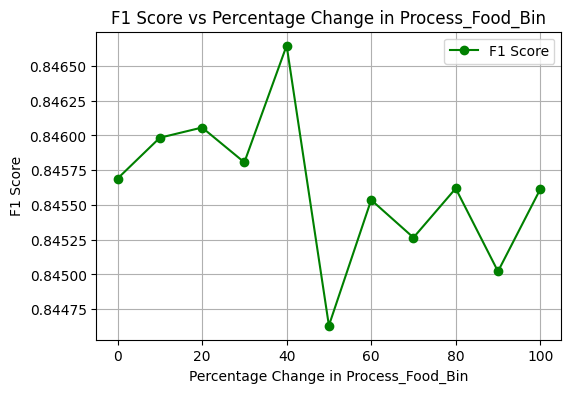

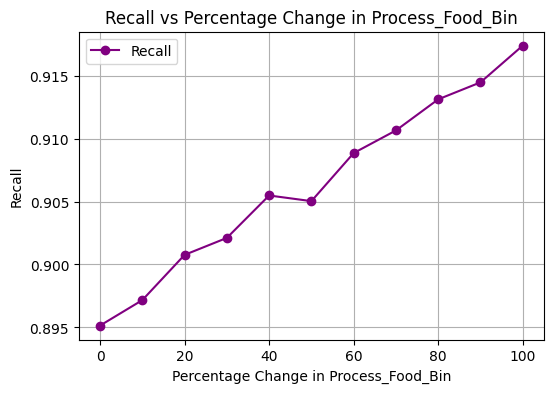

In [456]:



results_list = []

for percentage in range(0, 110, 10):
    accuracy, f1, precision, recall, auc = evaluate_model(X_train, X_test, y_train, y_test, percentage)
    print(f"{percentage}%")
    
    results_list.append({
        'Percentage': percentage,
        'Accuracy': accuracy,
        'F1_Score': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc
    })

results_df = pd.DataFrame(results_list)


import matplotlib.pyplot as plt

# Classification metrics to plot
classification_metrics = {
    #'Accuracy': ('Accuracy', 'blue'),
    'F1_Score': ('F1 Score', 'green'),
    #'Precision': ('Precision', 'red'),
    'Recall': ('Recall', 'purple'),
    #'AUC': ('AUC', 'orange')
}

# Loop through the metrics and create a plot for each
for metric, (label, color) in classification_metrics.items():
    plt.figure(figsize=(6, 4))
    plt.plot(results_df['Percentage'], results_df[metric], marker='o', color=color, label=label)

    plt.title(f'{label} vs Percentage Change in Process_Food_Bin')
    plt.xlabel('Percentage Change in Process_Food_Bin')
    plt.ylabel(label)
    plt.legend()
    plt.grid(True)
    plt.show()

In [394]:
results_df

,Percentage,Accuracy,F1_Score,Precision,Recall,AUC
0,0,0.807226,0.881358,0.831496,0.937582,0.193656
1,10,0.806842,0.881321,0.830227,0.939115,0.193831
2,20,0.806754,0.881436,0.829290,0.940580,0.195106
3,30,0.806772,0.881659,0.828194,0.942503,0.194962
4,40,0.805461,0.881061,0.826383,0.943487,0.196324
5,50,0.804849,0.880897,0.824958,0.944975,0.196480
6,60,0.805076,0.881283,0.823826,0.947355,0.196981
7,70,0.805339,0.881605,0.823145,0.949003,0.197061
8,80,0.804080,0.881027,0.821486,0.949873,0.197596
9,90,0.803713,0.881040,0.820093,0.951773,0.198039


# REGRESSION RUN

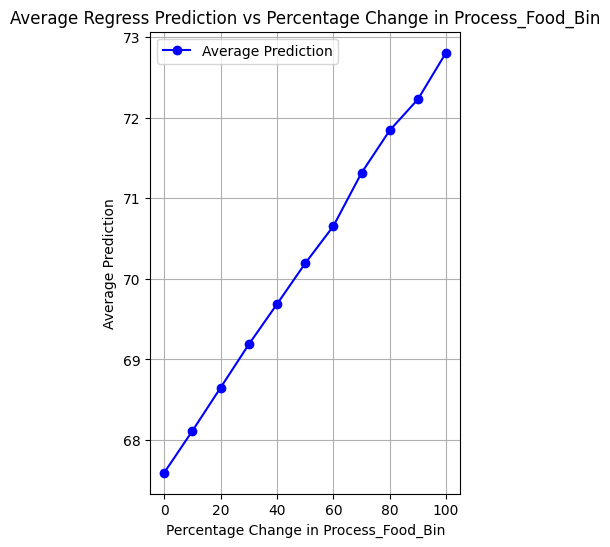

In [478]:
import pandas as pd
import matplotlib.pyplot as plt


# Initialize an empty list to store results
results_list_regression = []

# # Iterate over different percentages
# for percentage in range(0, 110, 10):
#     mse, rmse, r2 ,= evaluate_model_regression(X_train_reg, X_test_reg, y_train_reg, y_test_reg, percentage)
#     print(f"{percentage}%")
    
#     # Append the results to the list
#     results_list_regression.append({
#         'Percentage': percentage,
#         'MSE': mse,
#         'RMSE': rmse,
#         'R2': r2
#     })

# # Convert the results list to a DataFrame
# results_df_regression = pd.DataFrame(results_list_regression)




# Example usage for regression:
results_list_regression = []

for percentage in range(0, 110, 10):
    mse, rmse, r2, avg_pred = evaluate_model_regression(X_train_reg, X_test_reg, y_train_reg, y_test_reg, percentage)
    
    results_list_regression.append({
        'Percentage': percentage,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Avg_Prediction': avg_pred
    })

results_df_regression = pd.DataFrame(results_list_regression)






import matplotlib.pyplot as plt

# # Metrics to plot
# metrics = {
#     'MSE': ('MSE', 'blue'),
#     'RMSE': ('RMSE', 'green'),
#     'R2': ('R2 Score', 'red'),

# }

# # Loop through the metrics and create a plot for each
# for metric, (label, color) in metrics.items():
#     plt.figure(figsize=(6, 4))
#     plt.plot(results_df_regression['Percentage'], results_df_regression[metric], marker='o', color=color, label=label)
#     plt.title(f'{label} vs Percentage Change in Process_Food_Bin')
#     plt.xlabel('Percentage Change in Process_Food_Bin')
#     plt.ylabel(label)
#     plt.legend()
#     plt.grid(True)
#     plt.show()



plt.figure(figsize=(4, 6))
plt.plot(results_df_regression['Percentage'], results_df_regression['Avg_Prediction'], marker='o', color='blue', label='Average Prediction')
plt.title('Average Regress Prediction vs Percentage Change in Process_Food_Bin')
plt.xlabel('Percentage Change in Process_Food_Bin')
plt.ylabel('Average Prediction')
plt.legend()
plt.grid(True)
plt.show()



## Regression predicted target class distributions

0%
25%
50%
75%
100%


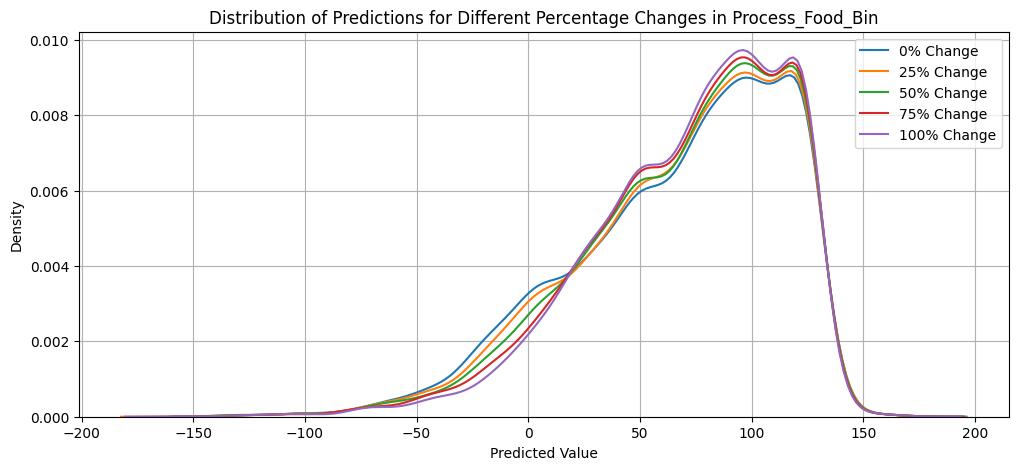

In [461]:
import matplotlib.pyplot as plt
import seaborn as sns


# # Store predictions for each percentage change
# predictions_dict = {}

# for percentage in range(0, 120, 20):
#     predictions = get_predictions(X_train_reg, X_test_reg, y_train_reg, percentage)
#     predictions_dict[percentage] = predictions

# # Plot histograms of predictions
# for percentage, preds in predictions_dict.items():
#     plt.figure(figsize=(8, 6))
#     sns.histplot(preds, kde=True, bins=20, color='blue')
#     plt.title(f'Distribution of Predictions - {percentage}% Change in Process_Food_Bin')
#     plt.xlabel('Predicted Value')
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()





    # Store predictions for each percentage change
predictions_dict = {}

for percentage in range(0, 125, 25):
    predictions = get_predictions(X_train_reg, X_test_reg, y_train_reg, percentage)
    predictions_dict[percentage] = predictions

# Plot KDEs of predictions in a single plot
plt.figure(figsize=(12, 5))

for percentage, preds in predictions_dict.items():
    sns.kdeplot(preds, label=f'{percentage}% Change')
    print(f"{percentage}%")

plt.title('Distribution of Predictions for Different Percentage Changes in Process_Food_Bin')
plt.xlabel('Predicted Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## Classification predicted target class score distributions

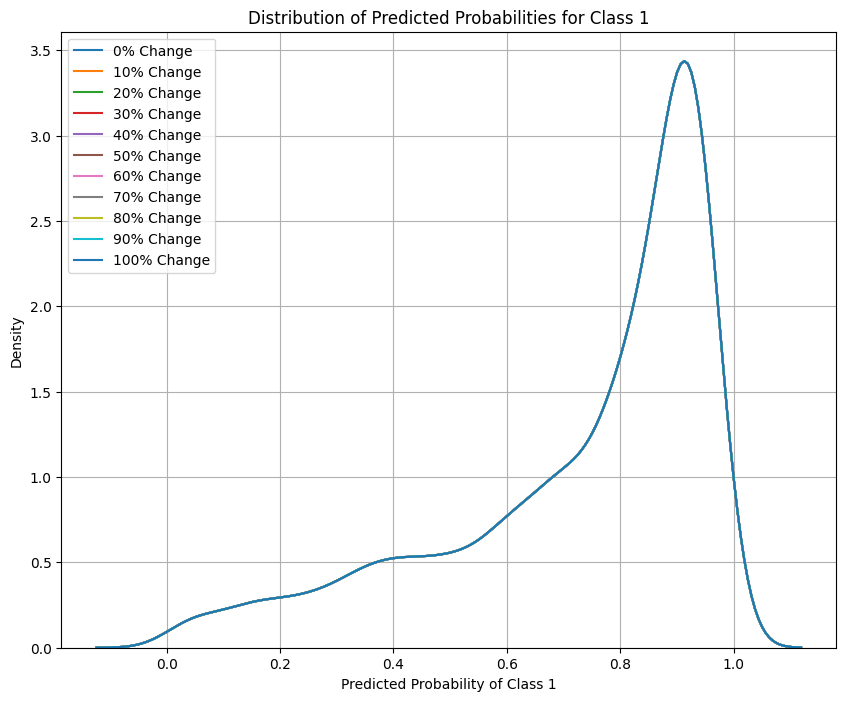

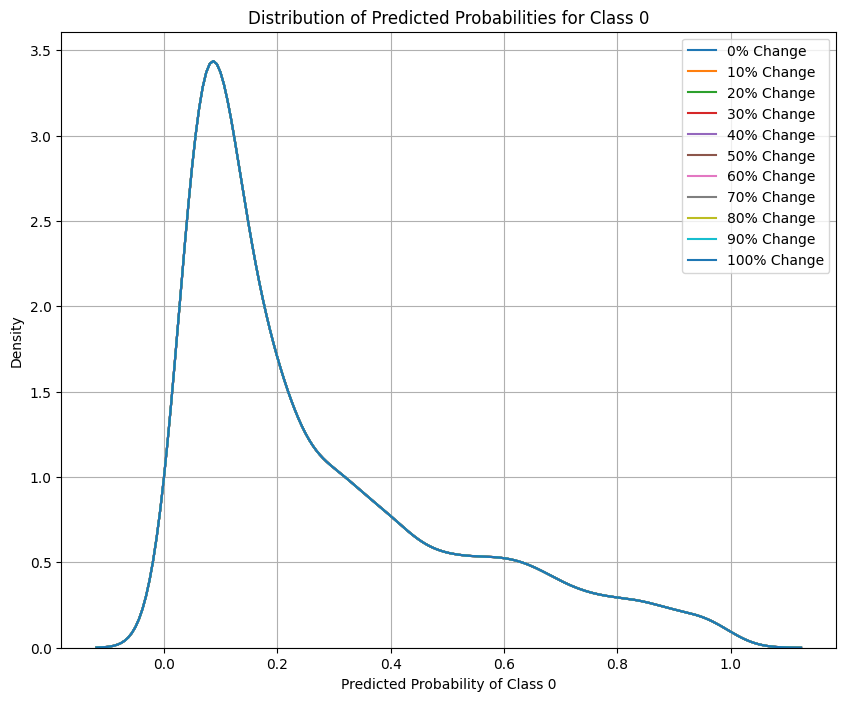

In [480]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Store predicted probabilities for class 1 for each percentage change
# probabilities_dict = {}

# target=1

# for percentage in range(0, 120, 40):
#     class_1_probs = get_predicted_probabilities(X_train, X_test, y_train, percentage)
#     probabilities_dict[percentage] = class_1_probs

# # Plot KDEs of predicted probabilities in a single plot
# plt.figure(figsize=(8, 5))

# for percentage, probs in probabilities_dict.items():
#     sns.kdeplot(probs, label=f'{percentage}% Change')

# plt.title('Distribution of Predicted Probabilities for Class 1 for Different Percentage Changes')
# plt.xlabel('Predicted Probability of Class 1')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.show()





# Example usage
percentages = range(0, 110, 10)
plot_predicted_probabilities(X_train, X_test, y_train, target_class=1, percentages=percentages)  # For class 1
plot_predicted_probabilities(X_train, X_test, y_train, target_class=0, percentages=percentages)  # For class 0





In [411]:
# Initialize XGBoost classifier and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")


Accuracy: 0.7718785517129404
F1 Score: 0.8521830615465543
Precision: 0.8018214215006929
Recall: 0.9092950157162102
AUC: 0.7740360570813806


In [415]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from tabulate import tabulate



# Assuming X and y are your features and target variable respectively
# Compute the mutual information
info_gain = mutual_info_classif(X, y)

# Create a DataFrame to view feature names and their corresponding information gain
features_info_gain = pd.DataFrame({'Feature': X.columns, 'InfoGain': info_gain})

# Sort the features by information gain in descending order
features_info_gain.sort_values(by='InfoGain', ascending=False, inplace=True)

# Print in a tabular form using tabulate
print(tabulate(features_info_gain, headers='keys', tablefmt='psql', showindex=False))

+---------------------------------------------------------------------------------------+-------------+
| Feature                                                                               |    InfoGain |
|---------------------------------------------------------------------------------------+-------------|
| Process_Food_Bin                                                                      | 0.0393835   |
| Frequency of doing exercise_Rarely/Never                                              | 0.0235558   |
| Physical violence in the home between family members                                  | 0.0174923   |
| Age_65-74                                                                             | 0.0147637   |
| Frequency of getting a good nights sleep_Hardly ever                                  | 0.0142669   |
| Frequency of Socializing_Rarely/Never                                                 | 0.0136375   |
| Frequency of doing exercise_Every day                         

In [430]:
# Extracting feature names from the DataFrame and converting to list
feature_names_list = features_info_gain['Feature'].tolist()

# Printing feature names in the desired format
#print(feature_names_list)


# Loop through the DataFrame and print each feature
for f in features_info_gain['Feature']:
    print(f"'{f}',")



'Process_Food_Bin',
'Frequency of doing exercise_Rarely/Never',
'Physical violence in the home between family members',
'Age_65-74',
'Frequency of getting a good nights sleep_Hardly ever',
'Frequency of Socializing_Rarely/Never',
'Frequency of doing exercise_Every day',
'Prolonged emotional or psychological abuse or neglect from parent/caregiver',
'Frequency of getting a good nights sleep_Most of the time',
'Age_18-24',
'Age_55-64',
'Age_18',
'Age_25-34',
'Frequency of getting a good nights sleep_Some of the time',
'Frequency of Socializing_1-3 times a month',
'Parental Divorce or family breakup',
'Age_21-24',
'Frequency of Socializing_Several days a week',
'Prolonged physical abuse| or severe physical assault CT',
'Threatening| coercive or controlling behavior by another person',
'Prefer not to say',
'Frequency of doing exercise_Few days a week',
'Prolonged or sustained bullying in person from peers',
'Biological Sex_Male',
'Prolonged sexual abuse| or severe sexual assault.',
'Biologi